In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('musicdatasets/spam.csv',encoding='ISO-8859-1')
data.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [3]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data['v1'][0]

'ham'

In [6]:
data['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
data.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [8]:
data['class'] = data.label.map({'spam':0,'ham':1})


In [9]:
data.describe()

,class
count,5572.000000
mean,0.865937
std,0.340751
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
data.groupby(['label']).describe()

class                                   
        count mean  std  min  25%  50%  75%  max
label                                           
ham    4825.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
spam    747.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [11]:
data.duplicated().sum()

403

In [12]:
data = data.drop_duplicates(keep='first')

In [13]:
data.shape

(5169, 3)

In [14]:
data.describe()

,class
count,5169.000000
mean,0.873670
std,0.332253
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [15]:
data['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

In [16]:
import nltk
from nltk.corpus import stopwords
import string

In [17]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [18]:
def tranform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    
tranform_text('hello my name is gaurav !! and im loving this  machine learning practice')

'hello name gaurav im love machin learn practic'

In [19]:
data['transformed_text'] = data['message'].apply(tranform_text)

In [20]:
from wordcloud import WordCloud

In [21]:
spam_df = data.loc[data['class']==1]
spam_df.head(2)

,label,message,class,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",1,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,1,ok lar joke wif u oni


In [22]:
import matplotlib.pyplot as plt


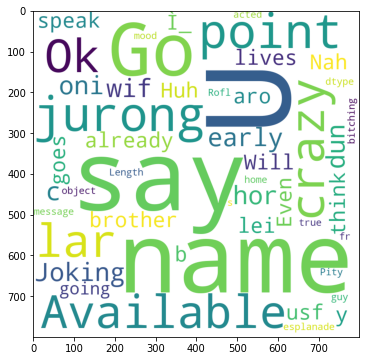

In [23]:
wc_spam = WordCloud(width=800,height=800,background_color='white').generate(str(spam_df['message']))
plt.figure(figsize=(15,6))
plt.imshow(wc_spam)

In [24]:
# import matplotlib.pyplot as plt
# %matplotlib inline

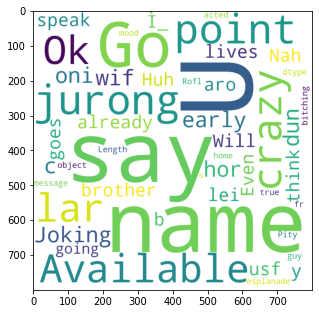

In [25]:
fig = plt.figure(figsize=(5,10))
plt.imshow(wc_spam)

In [26]:
ham_df = data.loc[data['class']==0]

In [27]:
wc_ham = WordCloud(width=800,height=800,background_color='white').generate(str(ham_df['message']))

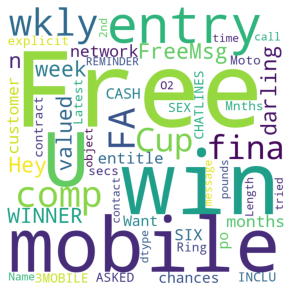

In [28]:
fig = plt.figure(figsize=(5,10))
plt.imshow(wc_ham)
plt.axis('off')
plt.show()

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix
import sklearn.linear_model as lm
import os

In [30]:
cv = CountVectorizer(stop_words='english')
X=cv.fit_transform(data['transformed_text']).toarray()
# y=cv.fit_transform(data['label']).toarray()



In [31]:
y=data['class'].values
y.shape

(5169,)

In [32]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [33]:
X_train.shape

(4135, 6580)

In [34]:
y_train.shape

(4135,)

In [35]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [36]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [37]:
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(precision_score(y_test,gb_pred))

0.8617021276595744
[[110  16]
 [127 781]]
0.9799247176913425


In [38]:
mb.fit(X_train,y_train)
mb_pred = mb.predict(X_test)
print(accuracy_score(y_test,mb_pred))
print(confusion_matrix(y_test,mb_pred))
print(precision_score(y_test,mb_pred))

0.9777562862669246
[[116  10]
 [ 13 895]]
0.988950276243094


In [39]:
bb.fit(X_train,y_train)
bb_pred = bb.predict(X_test)
print(accuracy_score(y_test,bb_pred))
print(confusion_matrix(y_test,bb_pred))
print(precision_score(y_test,bb_pred))

0.9622823984526112
[[ 93  33]
 [  6 902]]
0.9647058823529412


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [41]:
lr = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
mb = MultinomialNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=50,random_state=2)
adb = AdaBoostClassifier(n_estimators=50,random_state=2)
bagg = BaggingClassifier(n_estimators=50,random_state=2)
extree = ExtraTreesClassifier(n_estimators=50,random_state=2)
Gb = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbt = XGBClassifier(n_estimators=50,random_state=2)

In [42]:
clsf={
    'SVC':svc,
    'LR':lr,
    'NM':mb,
    'KNN':knn,
    'DT':dt,
    'RF':rf,
    'Adaboost':adb,
    'bagging':bagg,
    'ETC':extree,
    'GB':Gb,
    'XGBT':xgbt
}

In [43]:
def train_model(clsf,X_train,y_train,X_test,y_test):
    clsf.fit(X_train,y_train)
    y_pred = clsf.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    precision = precision_score(y_pred,y_test)
    
    return accuracy,precision

In [44]:
train_model(svc,X_train,y_train,X_test,y_test)

(0.9313346228239845, 0.9680616740088106)

In [45]:
accuracy_scores=[]
precision_scores=[]

for name,alg in clsf.items():
    acc , prc = train_model(alg,X_train,y_train,X_test,y_test)
    
    print('Algorithm: ',name)
    print('Accuracy is: ',acc)
    print('Precision is: ',prc)
    print('\n')

    
    accuracy_scores.append(acc)
    precision_scores.append(prc)

Algorithm:  SVC
Accuracy is:  0.9313346228239845
Precision is:  0.9680616740088106


Algorithm:  LR
Accuracy is:  0.9700193423597679
Precision is:  0.9966960352422908


Algorithm:  NM
Accuracy is:  0.9777562862669246
Precision is:  0.98568281938326


Algorithm:  KNN
Accuracy is:  0.9090909090909091
Precision is:  1.0


Algorithm:  DT
Accuracy is:  0.9381044487427466
Precision is:  0.9889867841409692


Algorithm:  RF
Accuracy is:  0.9700193423597679
Precision is:  1.0


Algorithm:  Adaboost
Accuracy is:  0.9574468085106383
Precision is:  0.9900881057268722


Algorithm:  bagging
Accuracy is:  0.971953578336557
Precision is:  0.9944933920704846


Algorithm:  ETC
Accuracy is:  0.9758220502901354
Precision is:  1.0


Algorithm:  GB
Accuracy is:  0.9468085106382979
Precision is:  1.0




/home/woyce-1-5/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Algorithm:  XGBT
Accuracy is:  0.965183752417795
Precision is:  0.9966960352422908




In [46]:
from sklearn.ensemble import StackingClassifier

In [47]:
estimators = [('lr',LogisticRegression(solver='liblinear',penalty='l1')),
              ('nm',MultinomialNB()),
              ('rf',RandomForestClassifier(n_estimators=50,random_state=2)),
              ('bagging',BaggingClassifier(n_estimators=50,random_state=2)),
              ('etc',ExtraTreesClassifier(n_estimators=50,random_state=2))]

In [48]:
stk = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

In [49]:
stk.fit(X_train,y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(penalty='l1',
                                                   solver='liblinear')),
                               ('nm', MultinomialNB()),
                               ('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('bagging',
                                BaggingClassifier(n_estimators=50,
                                                  random_state=2)),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=LogisticRegression())

In [56]:
est_pred = stk.predict(X_test)
print(accuracy_score(y_test,est_pred))
print(precision_score(y_test,est_pred))

0.9854932301740812
0.985854189336235


In [54]:
# import pickle
stk1 = StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier())

In [55]:
stk.fit(X_train,y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(penalty='l1',
                                                   solver='liblinear')),
                               ('nm', MultinomialNB()),
                               ('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('bagging',
                                BaggingClassifier(n_estimators=50,
                                                  random_state=2)),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=LogisticRegression())

In [58]:
est_pred1 = stk.predict(X_test)
print(accuracy_score(y_test,est_pred1))
print(precision_score(y_test,est_pred1))

0.9854932301740812
0.985854189336235


In [59]:
import pickle
pickle.dump(stk,open('model.pkl','wb'))

In [60]:
pickle.dump(cv,open('vector.pkl','wb'))